In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
file_path = "../backend/data/quota.csv"

In [71]:
df = pd.read_csv(file_path)

# Asegurarse de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'], format="ISO8601")

# Extraer el año de cada fecha y crear una nueva columna 'year'
df['year'] = df['date'].dt.year

# Display the first few rows of the DataFrame
print(df.head())

/tmp/ipykernel_484729/1945138535.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


        id                             date         category  quota banner  \
0  4335060 2021-01-30 20:04:55.907763+00:00  04 - Ingeniería    4.0      0   
1  4335061 2021-01-30 20:04:56.148198+00:00  Vacantes libres    1.0      0   
2  4335062 2021-01-30 20:04:56.148198+00:00  04 - Ingeniería   11.0      0   
3  4335063 2021-01-30 20:04:56.387025+00:00  Vacantes libres    0.0      0   
4  4335064 2021-01-30 20:04:56.387025+00:00  04 - Ingeniería   10.0      0   

   section_id initials  year  
0       24405  IIQ3643  2021  
1       24406  IIQ3663  2021  
2       24406  IIQ3663  2021  
3       24407  IIQ3683  2021  
4       24407  IIQ3683  2021  


In [73]:
date_ranges = [
    ('df2021_1', '2021-01-22', '2021-01-30'),
    ('df2021_2', '2021-08-02', '2021-08-13'),
    ('df2021_3', '2021-12-28', '2021-12-28'),
    ('df2022_1', '2022-01-06', '2022-01-18'),
    ('df2022_2', '2022-07-25', '2022-08-05'),
    ('df2022_3', '2022-12-20', '2022-12-20'),
    ('df2023_1', '2023-01-05', '2023-01-17'),
    ('df2023_2', '2023-07-21', '2023-08-04')
]

# Create an empty dictionary to store the sub-dataframes
dfs_dict = {}

# Iterate through the date ranges and extract the corresponding data
for name, start_date, end_date in date_ranges:
    mask = (df['date'] >= start_date) & (df['date'] <= end_date) & (df['category'] == 'Vacantes libres')
    dfs_dict[name] = df[mask].copy()

In [100]:
desired_initials = "IIC2133"

tmp_df = dfs_dict['df2021_1']

result = df[df['initials'] == desired_initials]

# Display the result
print(result)

              id                             date  \
15459    4350785 2021-01-30 21:33:32.857285+00:00   
15460    4350786 2021-01-30 21:33:32.857285+00:00   
15461    4350787 2021-01-30 21:33:32.857285+00:00   
15462    4350788 2021-01-30 21:33:33.104172+00:00   
15463    4350789 2021-01-30 21:33:33.104172+00:00   
...          ...                              ...   
3717256  6368118 2023-07-22 02:21:30.105455+00:00   
3717257  6368119 2023-07-22 02:21:30.105455+00:00   
3717258  6368120 2023-07-22 02:21:30.105455+00:00   
3717259  6368121 2023-07-22 02:21:30.105455+00:00   
3717260  6368122 2023-07-22 02:21:30.105455+00:00   

                                                  category  quota banner  \
15459                                      Vacantes libres    0.0      0   
15460    A153-Certificado Académico en Computación e In...    5.0      0   
15461                                      04 - Ingeniería    0.0      0   
15462                                      Vacantes libres 

In [82]:
dfs_dict['df2021_2']['banner'].unique()

array(['0', '1-0', '1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8',
       '1-9', '1-10', '1-11', '1-12', '1-13', '1-14', nan, 0.0],
      dtype=object)

In [97]:
# Define the minimum number of timesteps
min_timesteps = 40  # Change this to your desired minimum value

# Group the DataFrame by "section_id" and apply the filter to count groups with more than min_timesteps
filtered_df = dfs_dict['df2021_1'].groupby("section_id").filter(lambda group: len(group) > min_timesteps)

# Count the number of unique section_id values in the filtered DataFrame
num_groups_with_more_than_min_timesteps = filtered_df['section_id'].nunique()

# Print the result
print(f"Number of groups with more than {min_timesteps} timesteps: {num_groups_with_more_than_min_timesteps}")


Number of groups with more than 40 timesteps: 5176


424


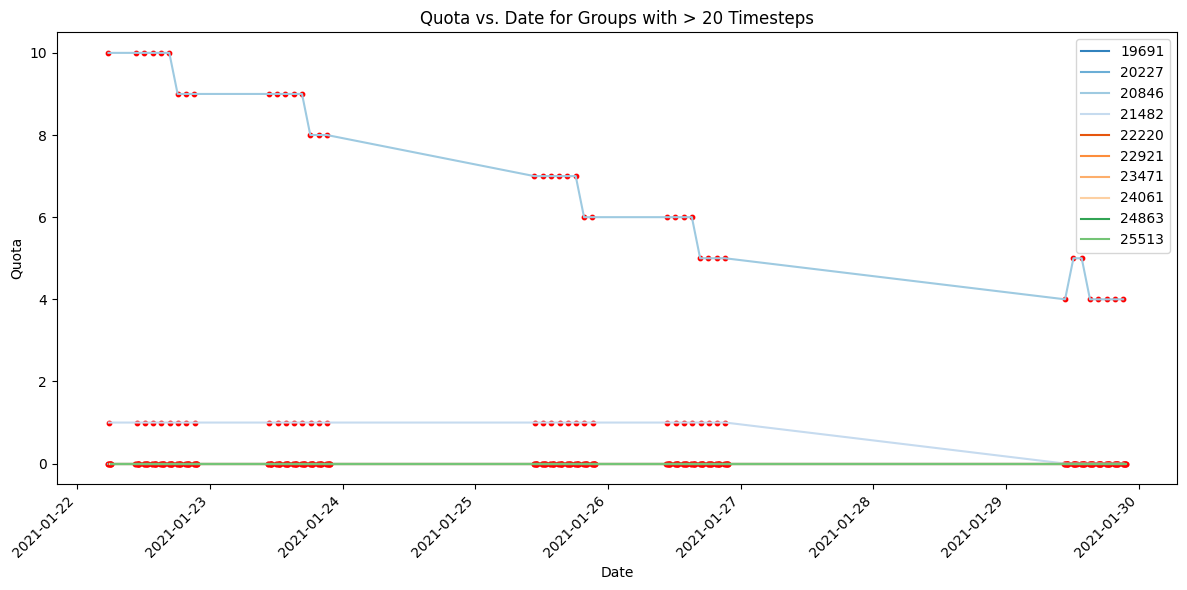

In [122]:
#dfs_tmp = dfs_dict['df2021_1'][dfs_dict['df2021_1']['initials'] == desired_initials]
dfs_tmp = dfs_dict['df2021_1']
# Filter groups with more than 20 timesteps
grouped = dfs_tmp.groupby("section_id").filter(lambda group: len(group) > 40)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

print(int(len(grouped)/500))

# Define a colormap for different line colors
cmap = plt.get_cmap('tab20c')

colors = iter(cmap(np.linspace(0, 1, 20)))

# Iterate through groups and plot each one with a different color
idx = 0
for key, group in grouped.groupby("section_id"):
    idx += 1
    if (idx+4) % 500 !=0 :
        continue
    color = next(colors)
    group.plot(x="date", y="quota", label=key, ax=ax, color=color)

    ax.scatter(group["date"], group["quota"], color='red', s=10, label=None)


# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Quota")
ax.set_title("Quota vs. Date for Groups with > 20 Timesteps")

# Add legend
ax.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()